In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle

# Load the data
df = pd.read_csv("D:\\Project\\Car_Dheko\\op\\final_cleaned_car_dheko.csv", low_memory=False)

In [3]:
df.columns

Index(['ft', 'bt', 'km', 'transmission', 'ownerNo', 'model',
       'centralVariantId', 'Insurance Validity', 'Seats',
       'Engine Displacement', 'Mileage', 'Max Power', 'Torque', 'Wheel Size',
       'Color', 'Engine Type', 'Max Power_rpm', 'Max Torque', 'No of Cylinder',
       'Value Configuration', 'Fuel Supply System', 'Length', 'Width',
       'Height', 'Wheel Base', 'Front Tread', 'Kerb Weight', 'Gross Weight',
       'Gear Box', 'Drive Type', 'Steering Type', 'Turning Radius',
       'Front Brake Type', 'Top Speed', 'Acceleration', 'Tyre Type',
       'Alloy Wheel Size', 'Cargo Volume', 'City', 'Car_age', 'price'],
      dtype='object')

In [3]:
#Select required columns
required_columns = ['ft', 'bt', 'km', 'transmission', 'model', 'Insurance Validity', 'Seats', 
                    'Engine Displacement', 'Mileage', 'Max Power', 'Torque', 'No of Cylinder', 'Length', 'Width', 
                    'Height', 'Kerb Weight','Drive Type', 'Cargo Volume', 'City', 'Car_age', 'price']

df = df[required_columns]


# Replace inf with NaN and fill NaNs with mean
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(df.mean(), inplace=True)

In [5]:
# Separate features and target variable
X = df.drop(['price'], axis=1)  # Features
y = df['price']  # Target variable
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes of the splits
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (5549, 20)
y_train shape: (5549,)
X_test shape: (1388, 20)
y_test shape: (1388,)


In [7]:
# 1. Linear Regression - Model Fit and Predict
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred_lin = lin_model.predict(X_test)

In [9]:
# 2. Random Forest Regressor - GridSearchCV and Model Fit/Predict
rf_model = RandomForestRegressor(random_state=42)
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=3, n_jobs=-1, verbose=2, scoring='r2')
rf_grid_search.fit(X_train, y_train)
best_rf_model = rf_grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


In [11]:
# 3. Gradient Boosting Regressor - GridSearchCV and Model Fit/Predict
gb_model = GradientBoostingRegressor(random_state=42)
gb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.05],
    'max_depth': [3, 5, 10]
}
gb_grid_search = GridSearchCV(estimator=gb_model, param_grid=gb_param_grid, cv=3, n_jobs=-1, verbose=2, scoring='r2')
gb_grid_search.fit(X_train, y_train)
best_gb_model = gb_grid_search.best_estimator_
y_pred_gb = best_gb_model.predict(X_test)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


In [13]:
# 4. Decision Tree Regressor - GridSearchCV and Model Fit/Predict
dt_model = DecisionTreeRegressor(random_state=42)
dt_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}
dt_grid_search = GridSearchCV(estimator=dt_model, param_grid=dt_param_grid, cv=3, n_jobs=-1, verbose=2, scoring='r2')
dt_grid_search.fit(X_train, y_train)
best_dt_model = dt_grid_search.best_estimator_
y_pred_dt = best_dt_model.predict(X_test)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [15]:
# Evaluate Models
def evaluate_model(model_name, y_test, y_pred):
    print(f"{model_name} Evaluation:")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
    print(f"R²: {r2_score(y_test, y_pred):.2f}")
    print()

print("Evaluating all models:")
evaluate_model("Linear Regression", y_test, y_pred_lin)
evaluate_model("Random Forest Regressor", y_test, y_pred_rf)
evaluate_model("Gradient Boosting Regressor", y_test, y_pred_gb)
evaluate_model("Decision Tree Regressor", y_test, y_pred_dt)

Evaluating all models:
Linear Regression Evaluation:
MAE: 155357.31
MSE: 65838553759.89
R²: 0.69

Random Forest Regressor Evaluation:
MAE: 64368.83
MSE: 10062337627.45
R²: 0.95

Gradient Boosting Regressor Evaluation:
MAE: 62669.14
MSE: 9779793780.73
R²: 0.95

Decision Tree Regressor Evaluation:
MAE: 86504.35
MSE: 20356868303.68
R²: 0.90



In [17]:

# Calculate R² scores for all models
r2_lin = r2_score(y_test, y_pred_lin)
r2_rf = r2_score(y_test, y_pred_rf)
r2_gb = r2_score(y_test, y_pred_gb)
r2_dt = r2_score(y_test, y_pred_dt)

# Calculate MSE and MAE for all models
mse_lin = mean_squared_error(y_test, y_pred_lin)
mae_lin = mean_absolute_error(y_test, y_pred_lin)

mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)

mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)

# Choose the best model based on R² score
best_model = None
best_model_name = None
best_r2 = max(r2_lin, r2_rf, r2_gb, r2_dt)

if best_r2 == r2_lin:
    best_model = lin_model
    best_model_name = "Linear Regression"
    best_mse = mse_lin
    best_mae = mae_lin
elif best_r2 == r2_rf:
    best_model = best_rf_model
    best_model_name = "Random Forest Regressor"
    best_mse = mse_rf
    best_mae = mae_rf
elif best_r2 == r2_gb:
    best_model = best_gb_model
    best_model_name = "Gradient Boosting Regressor"
    best_mse = mse_gb
    best_mae = mae_gb
else:
    best_model = best_dt_model
    best_model_name = "Decision Tree Regressor"
    best_mse = mse_dt
    best_mae = mae_dt

# Display all models' results
print("Model Performance Metrics:")
print(f"Linear Regression - R²: {r2_lin:.2f}, MSE: {mse_lin:.2f}, MAE: {mae_lin:.2f}")
print(f"Random Forest Regressor - R²: {r2_rf:.2f}, MSE: {mse_rf:.2f}, MAE: {mae_rf:.2f}")
print(f"Gradient Boosting Regressor - R²: {r2_gb:.2f}, MSE: {mse_gb:.2f}, MAE: {mae_gb:.2f}")
print(f"Decision Tree Regressor - R²: {r2_dt:.2f}, MSE: {mse_dt:.2f}, MAE: {mae_dt:.2f}")

# Display best model's results
print(f"\nThe best model is {best_model_name} with R²: {best_r2:.2f}")
print(f"Best Model - MSE: {best_mse:.2f}, MAE: {best_mae:.2f}")

Model Performance Metrics:
Linear Regression - R²: 0.69, MSE: 65838553759.89, MAE: 155357.31
Random Forest Regressor - R²: 0.95, MSE: 10062337627.45, MAE: 64368.83
Gradient Boosting Regressor - R²: 0.95, MSE: 9779793780.73, MAE: 62669.14
Decision Tree Regressor - R²: 0.90, MSE: 20356868303.68, MAE: 86504.35

The best model is Gradient Boosting Regressor with R²: 0.95
Best Model - MSE: 9779793780.73, MAE: 62669.14


In [19]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Feature Engineering: Calculate km_per_year and drop 'km'
df['km_per_year'] = df['km'] / df['Car_age'].replace(0, np.nan)
df.drop(columns=['km'], inplace=True)

# Additional Feature Engineering
df['power_to_weight'] = df['Max Power'] / df['Kerb Weight']  # Power-to-Weight Ratio
df['engine_size_per_cylinder'] = df['Engine Displacement'] / df['No of Cylinder'].replace(0, np.nan)  # Size per Cylinder
df['torque_to_power'] = df['Torque'] / df['Max Power'].replace(0, np.nan)  # Torque-to-Power Ratio
df['volume'] = df['Length'] * df['Width'] * df['Height']  # Volume of the Car

# Replace inf with NaN and fill NaNs with mean
df.replace([np.inf, -np.inf], np.nan, inplace=True)


required_columns = ['ft', 'bt', 'km', 'transmission', 'model', 'Insurance Validity', 'Seats', 
                    'Engine Displacement', 'Mileage', 'Max Power', 'Torque', 'No of Cylinder', 'Length', 'Width', 
                    'Height', 'Kerb Weight','Drive Type', 'Cargo Volume', 'City', 'Car_age', 'price', 'km_per_year', 
                   'power_to_weight', 'engine_size_per_cylinder', 'torque_to_power', 'volume']



# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(df.drop(['price'], axis=1))  # Features
y = df['price']  # Target variable

# Step 3: Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Model Training with Hyperparameter Tuning
gbr = GradientBoostingRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=3, n_jobs=-1, scoring='r2', verbose=2)
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Step 6: Model Evaluation
y_pred = best_model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"R2 Score: {r2}")
print(f"RMSE: {rmse}")

# Save the model
output_path = "D:/Project/Car_Dheko/op/gradient_boosting_model.pkl"

# Save the model
with open(output_path, 'wb') as f:
    pickle.dump(best_model, f)

print(f"Model saved to {output_path} using pickle.")
# To load the model later:
# with open(output_path, 'rb') as f:
#     loaded_model = pickle.load(f)


Fitting 3 folds for each of 729 candidates, totalling 2187 fits
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
R2 Score: 0.9542943911880939
RMSE: 98686.78367551943
Model saved to D:/Project/Car_Dheko/op/gradient_boosting_model.pkl using pickle.


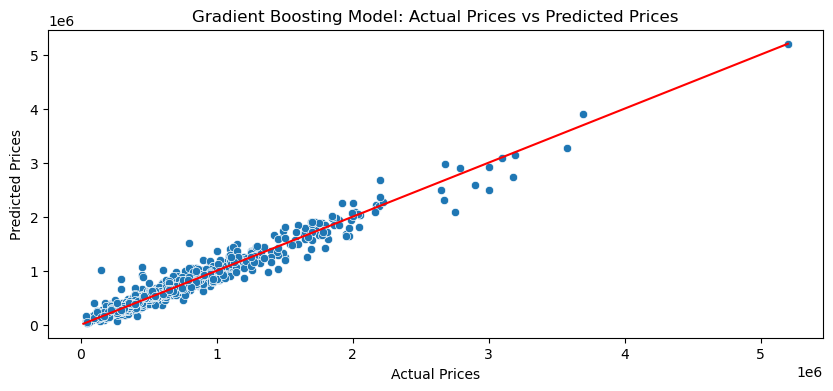

In [21]:
# Plotting Actual vs Predicted
plt.figure(figsize=(10, 4))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Gradient Boosting Model: Actual Prices vs Predicted Prices')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')  # Diagonal line for reference
plt.show()